## Introduction

This worksheet contains many examples of how to make and manipulate 2D line plots. Most of the examples have been taken directly from a [Matplotlib lecture](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) put together by J.R. Johansson. I have made a few modifications here and there, but the document is largely the same as Johansson’s lecture. I would recommend going through his lecture to better understand the various commands and methods of creating the plots; his lecture is far better documented than this document.

### Table of Contents
1. [Two approaches to making plots](#twoapproaches)
2. [Line types and color](#basics)
3. [Figure size, multipannel, and insets](#size)
4. [The legend](#legend)
5. [Fonts](#fonts)
6. [Multiple axes](#multiax)
7. [Publication ready plots](#pubplots)

### Loading needed packages and generating data to plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display 

# uncomment the following two lines when wishing to print to Latex pdf
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png', 'pdf')

x = np.linspace(0, 5, 10)
y = x ** 2

## Two approaches to making plots  <a class="anchor" id="twoapproaches"></a>

### Easy way (good for simple plots) <a class="anchor" id="simple"></a>

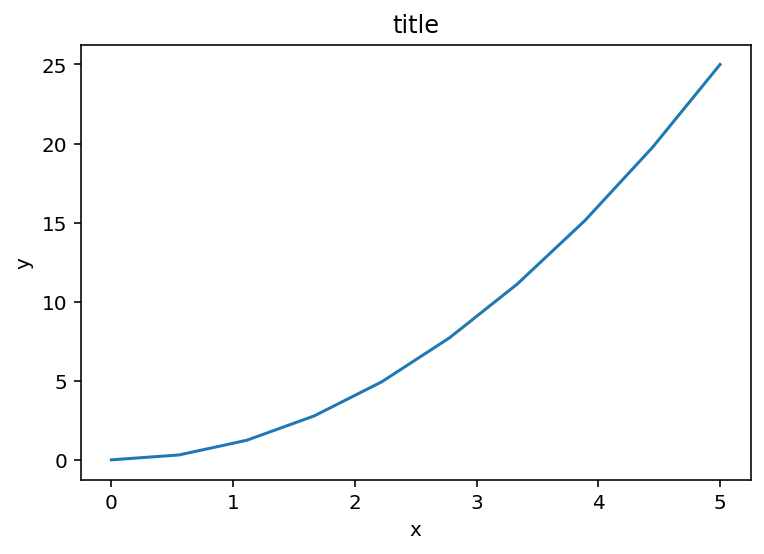

In [2]:
plt.plot(x, y,)
plt.xlabel('x')
plt.ylabel('y')
plt.title('title');

### More control (better for complicated plots) <a class="anchor" id="object"></a>

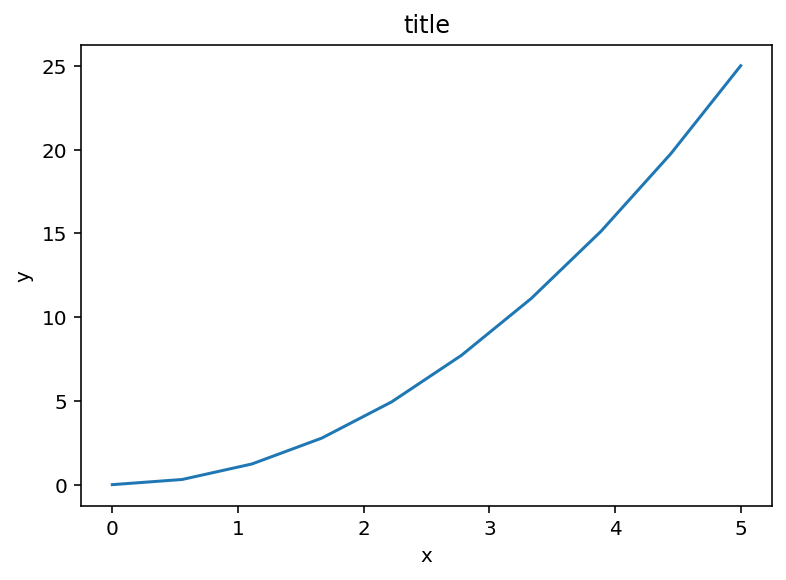

In [3]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1) 
                                          # default values [0.1, 0.1, 0.8, 0.8]

axes.plot(x, y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

You can also make plots (from one to many) using the `subplot` command. Firgure are saved using `plt.savefig('filename.pdf')`. Note that the extention you give the file sets the format.

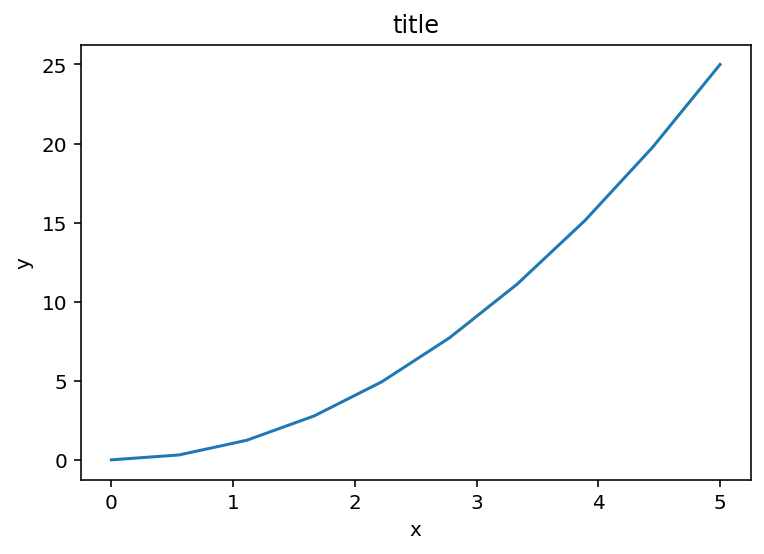

In [4]:
fig, axes = plt.subplots()
axes.plot(x, y,)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
plt.savefig('tester.pdf')

## Line types and color  <a class="anchor" id="basics"></a>

You can specify the line type and marker type. Google Matplotlib line style and marker style for more examples.

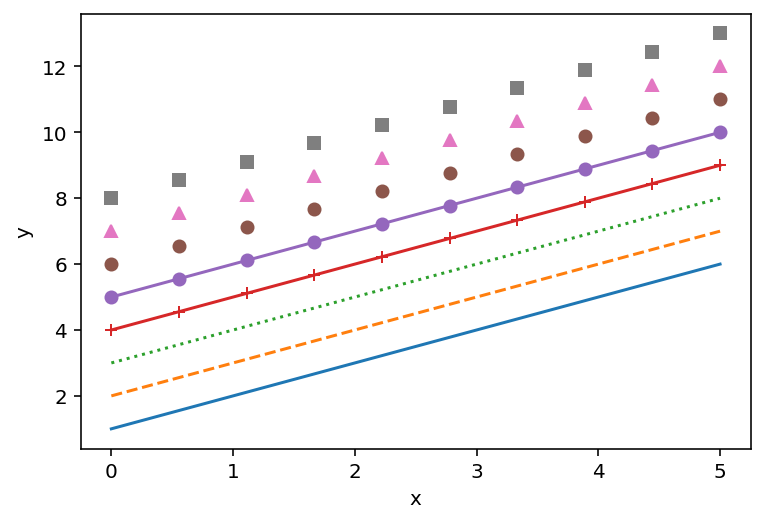

In [5]:
fig, ax = plt.subplots()

ax.plot(x, 1+x, ls='-')
ax.plot(x, 2+x, ls='--')
ax.plot(x, 3+x, ls=':')
ax.plot(x, 4+x, marker='+')
ax.plot(x, 5+x, marker='o')
ax.plot(x, 6+x, 'o')
ax.plot(x, 7+x, '^')
ax.plot(x, 8+x, 's')
ax.set_xlabel('x')
ax.set_ylabel('y');

It's also possible to specify specific colors (rather than using the defaults); again, Google Matplotlib line color to see more options.

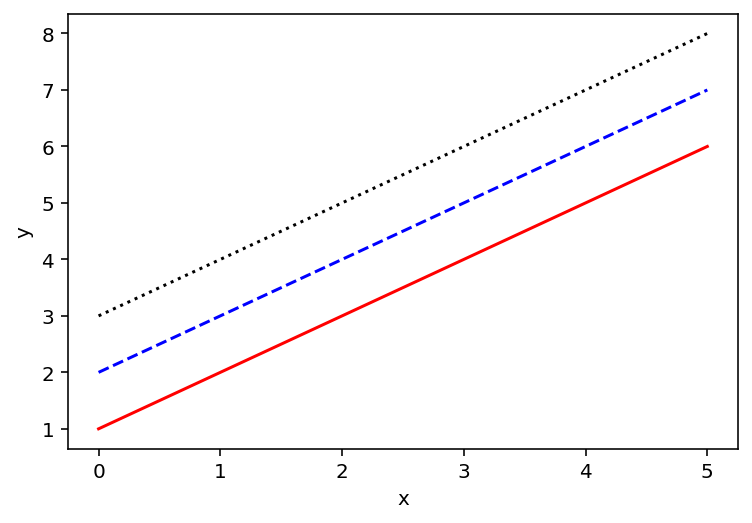

In [6]:
fig, ax = plt.subplots()

ax.plot(x, 1+x, color='red', ls='-')
ax.plot(x, 2+x,color='blue', ls='--')
ax.plot(x, 3+x,color='black', ls=':')
ax.set_xlabel('x')
ax.set_ylabel('y');

Or...

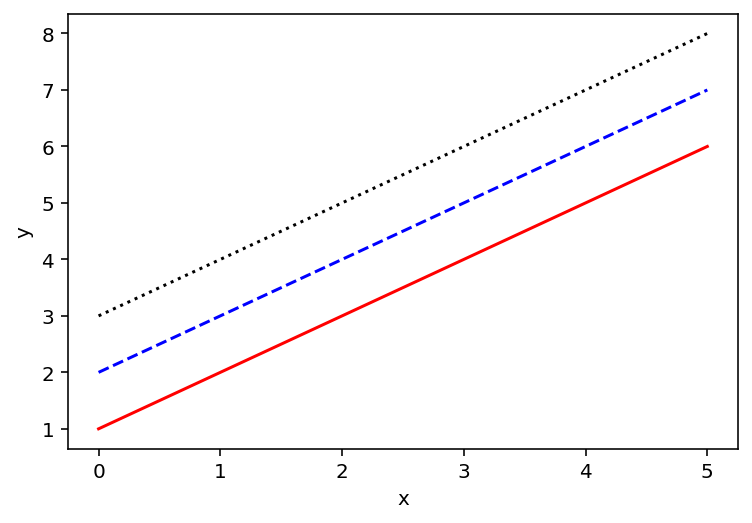

In [7]:
fig, ax = plt.subplots()

ax.plot(x, 1+x,'-r')
ax.plot(x, 2+x,'--b')
ax.plot(x, 3+x,':k')
ax.set_xlabel('x')
ax.set_ylabel('y');

Set the color using hex code ways to set color

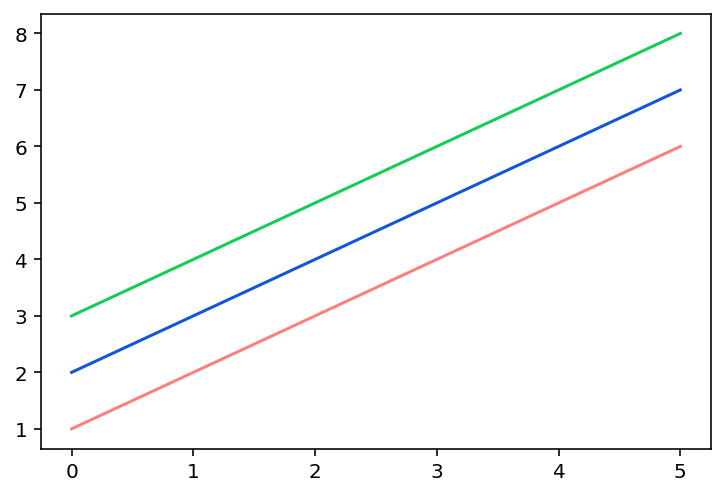

In [8]:
fig, ax = plt.subplots(1) # size in inches

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55");        # RGB hex code for a greenish color

## Figure size, multipannel, and insets <a class="anchor" id="size"></a>

Now let's make a figure a bit larger using the `figure` command by switching from the default of [0.1, 0.1, 0.8, 0.8] to [0.0, 0.0, 1, 1]

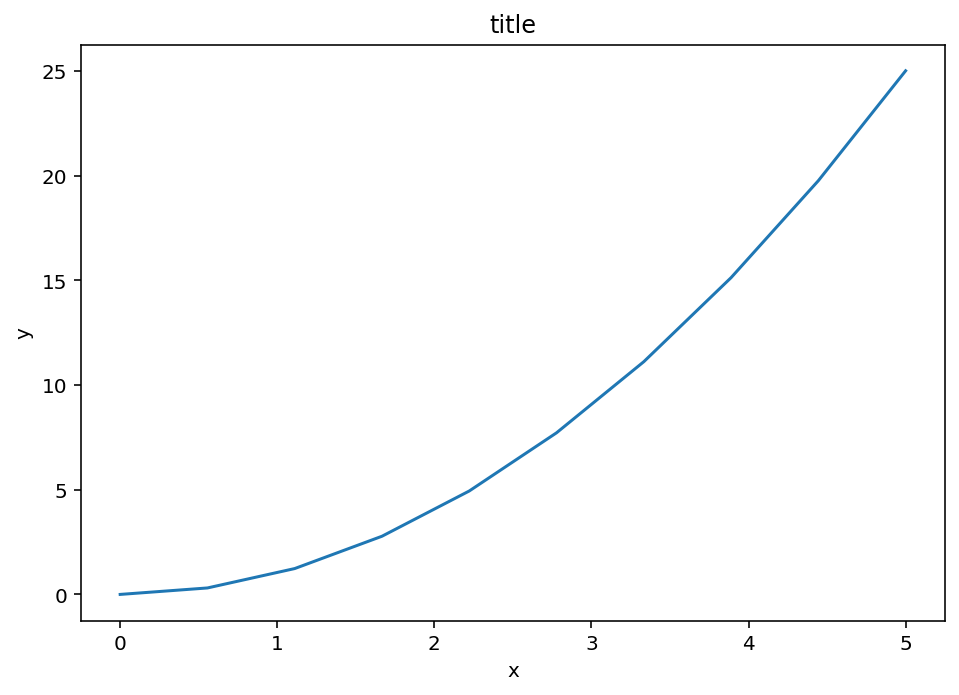

In [9]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1,1]) # left, bottom, width, height (range 0 to 1)
axes.plot(x, y)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

You can also set the size of the figure when using the `subfigure` command

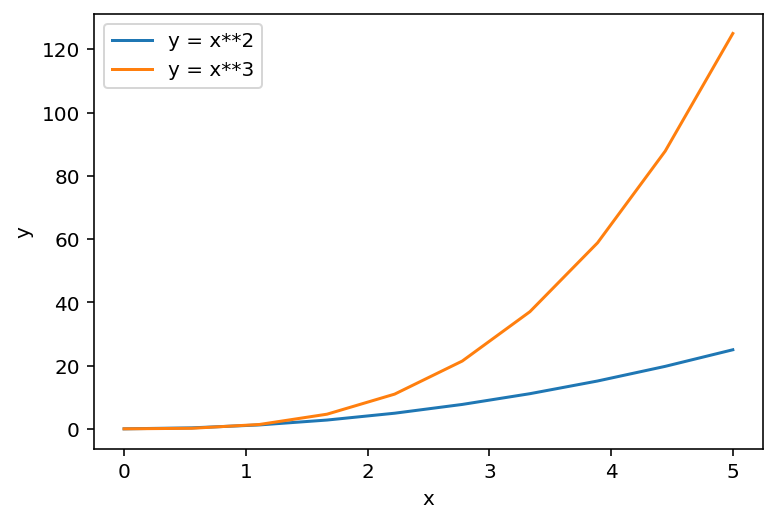

In [10]:
fig, ax = plt.subplots(figsize=(6,4)) # size in inches

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=2); # more examples on how to controll the legend are given below

Here are three examples with different subplots and line types.

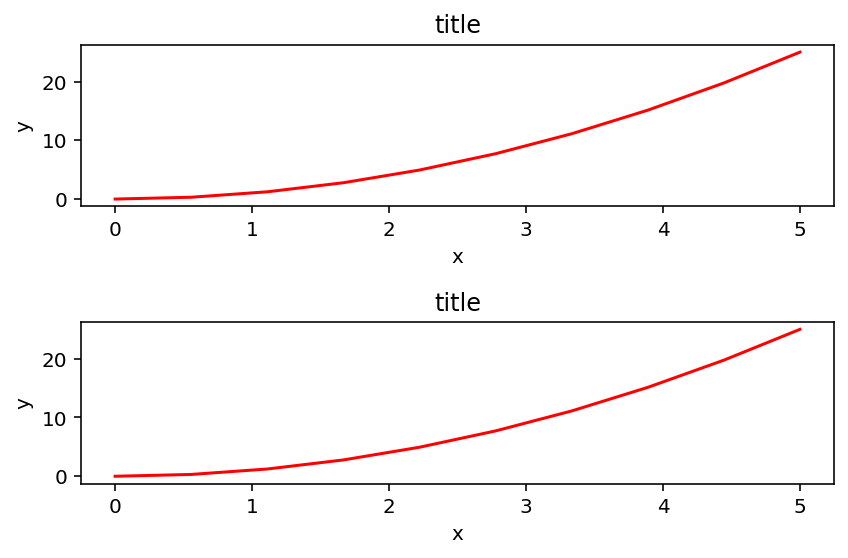

In [11]:
fig, axes = plt.subplots(nrows=2,ncols=1)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout();

In the above example, a for loop is used to cycle through the `axes` array. Below is an example where each item in the array is named initially in the definition of the subplot axes.

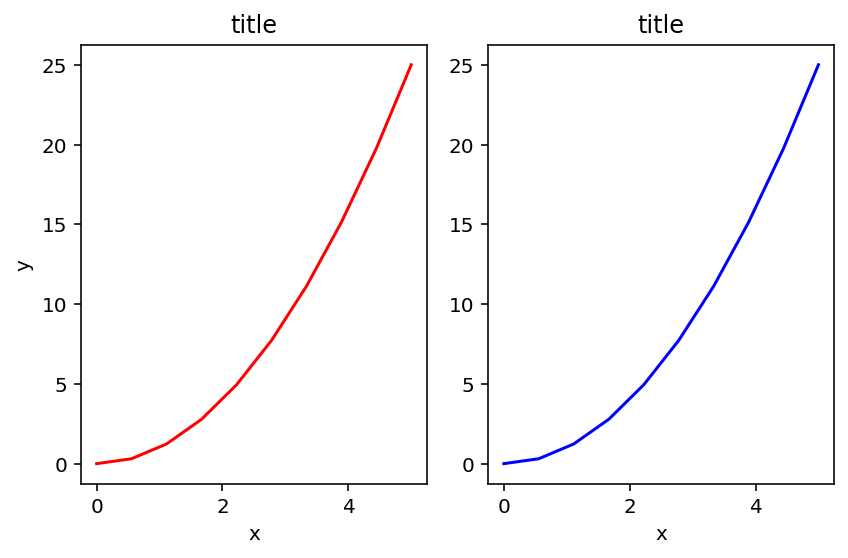

In [12]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)

ax1.plot(x, y, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('title')

ax2.plot(x, y, 'b')
ax2.set_xlabel('x')
#ax2.set_ylabel('y')
ax2.set_title('title')
    
fig.tight_layout();

In the next example, the axes are simply refered to using their array index.

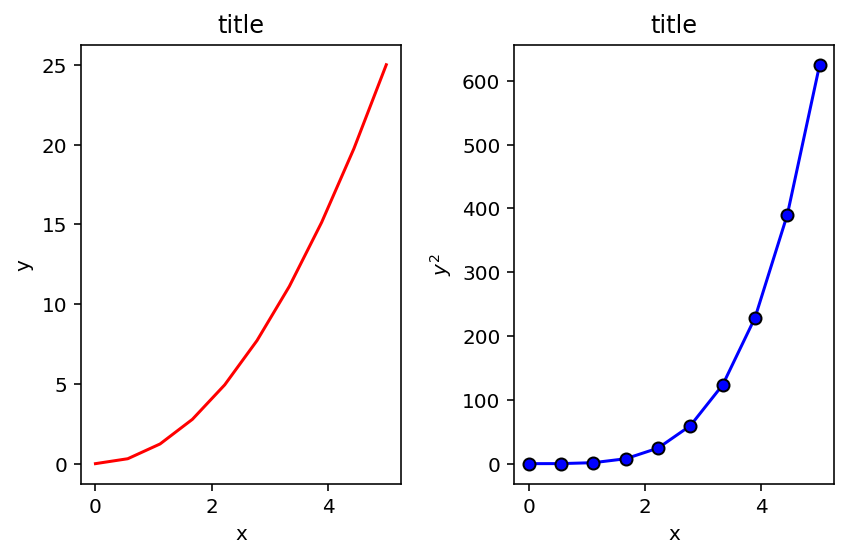

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=2)

ax[0].plot(x, y, 'r')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('title')

ax[1].plot(x, y**2, color='blue', ls='-', marker='o',markeredgecolor="black")
ax[1].set_xlabel('x')
ax[1].set_ylabel('$y^2$')
ax[1].set_title('title')
    
fig.tight_layout();

Make a figure with an inset

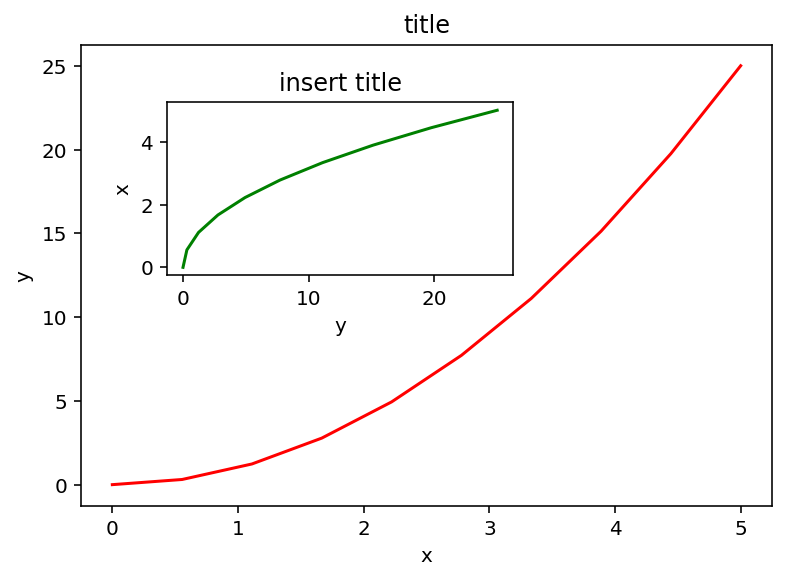

In [14]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title');

## The legend <a class="anchor" id="legend"></a>

The easiest way to include is legend is to include `label` markers for each line and then to `legend(loc)`. The `loc` designiation is the location. Typically upper right: `legend(loc=1)`,upper left: `legend(loc=2)`, bottom left: `legend(loc=3)`, or lower right: `legend(loc=4)`,

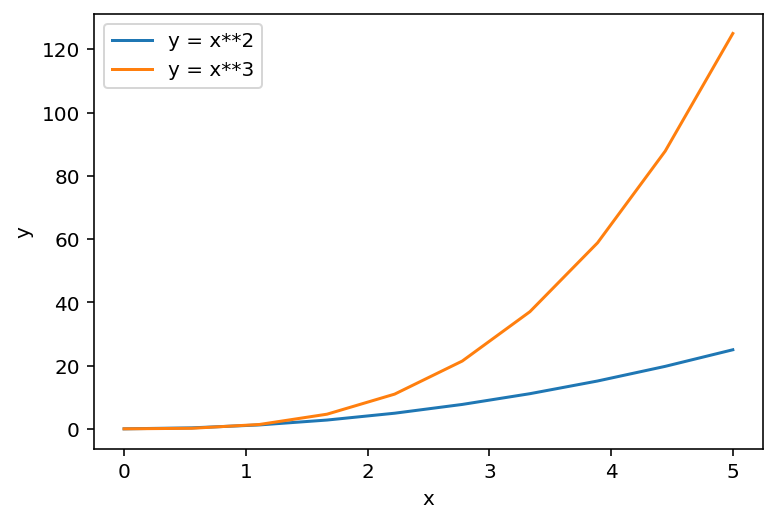

In [15]:
fig, ax = plt.subplots() 

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=2); # put the legend in the upper left... can also use legend(loc=2) without the ax.

Here are two examples with various modification to the legend

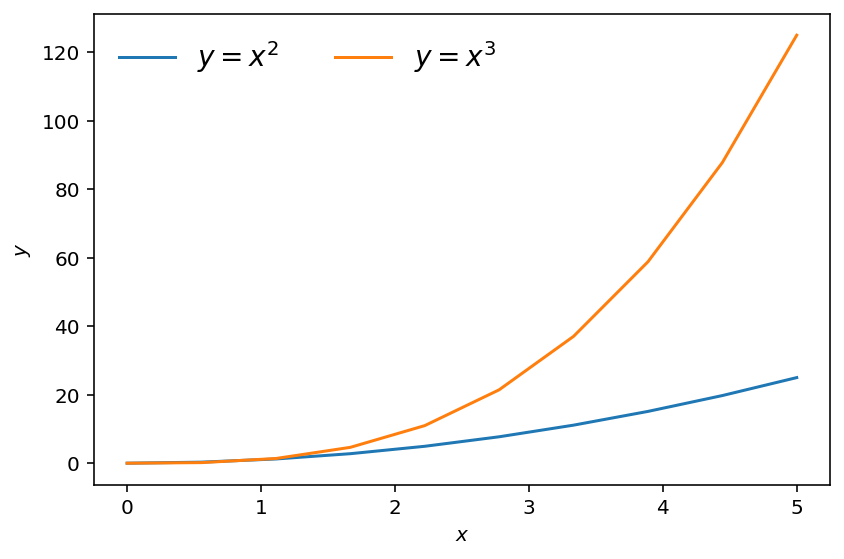

In [16]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = x^2$")
ax.plot(x, x**3, label=r"$y = x^3$")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.legend(loc=0, ncol=2, fontsize=14, frameon=False)
fig.tight_layout()

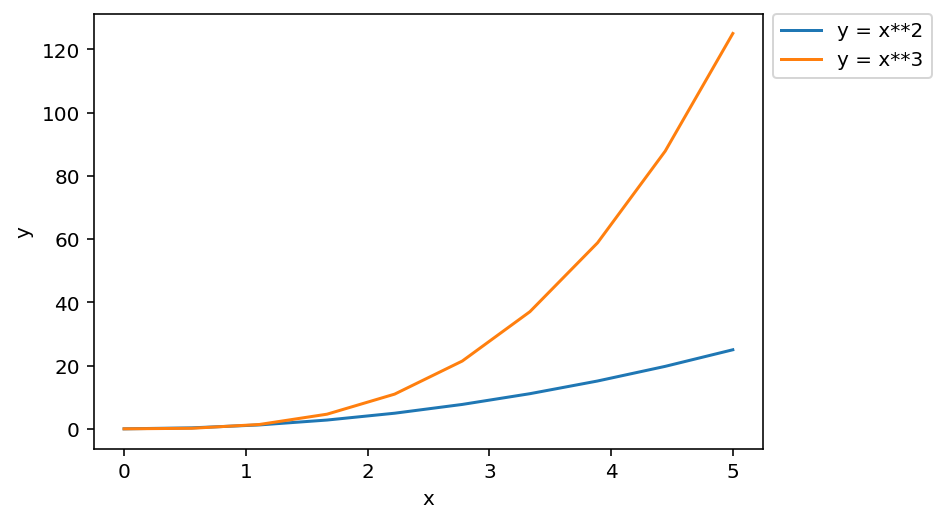

In [17]:
fig, ax = plt.subplots(figsize=(6,4)) # size in inches

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y');
ax.legend(loc=3, ncol=1, bbox_to_anchor=(1, 0.83)); # bbox_to_anchor(x,y) x and y go from 0 to 1 in reference from the "loc" position

## Fonts <a class="anchor" id="fonts"></a>

### Font size

Change only the font size of the axes title

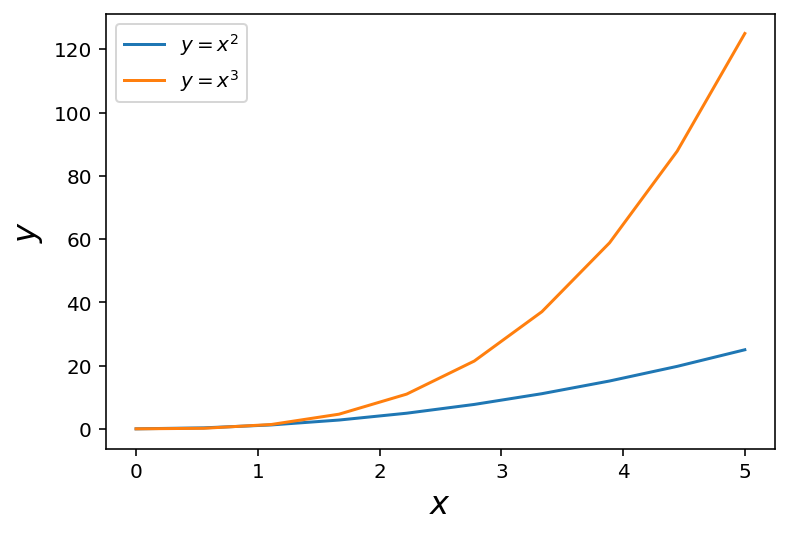

In [18]:
fig, ax = plt.subplots() # size in inches

ax.plot(x, x**2, label=r"$y = x^2$")
ax.plot(x, x**3, label=r"$y = x^3$")
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
ax.legend(loc=2);

In [19]:
# save the inline defaults
import matplotlib as mpl
inline_rc = dict(mpl.rcParams)

Change the global font size

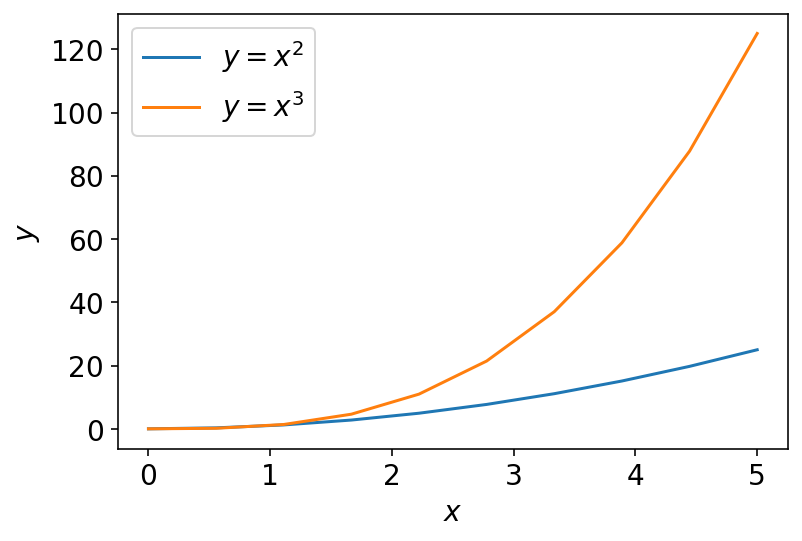

In [20]:
plt.matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots() # size in inches

ax.plot(x, x**2, label=r"$y = x^2$")
ax.plot(x, x**3, label=r"$y = x^3$")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend(loc=2);

You can also set these as follows:

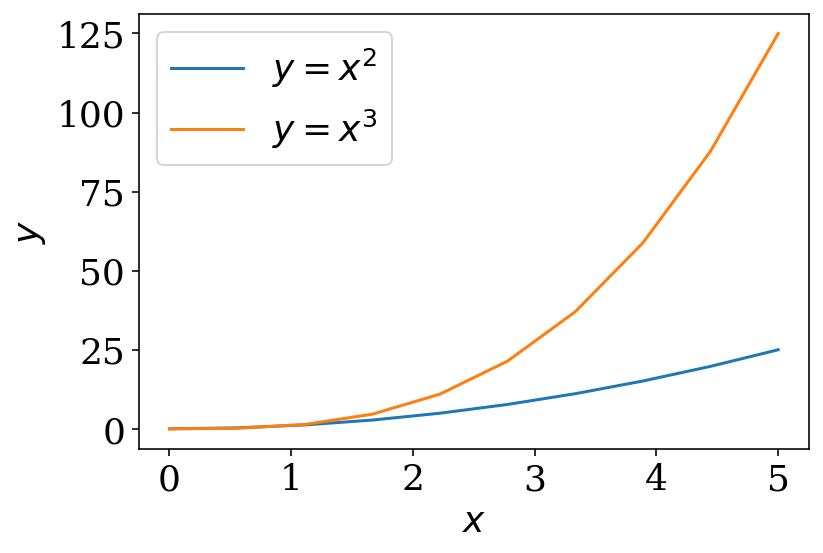

In [21]:
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "18"

fig, ax = plt.subplots() # size in inches

ax.plot(x, x**2, label=r"$y = x^2$")
ax.plot(x, x**3, label=r"$y = x^3$")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend(loc=2);

### Text and Math font families

In [22]:
# change font and size defaults
#mpl.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

#variations
#mpl.rcParams.update({'font.size': 18, 'font.family': 'serif'})
#mpl.rcParams.update({'font.size': 18, 'font.family': 'serif','mathtext.fontset': 'cm', 'mathtext.rm':'serif'})

# use full blown Latex
#mpl.rcParams.update({'font.size': 18, 'text.usetex': True}) #use Latex to render

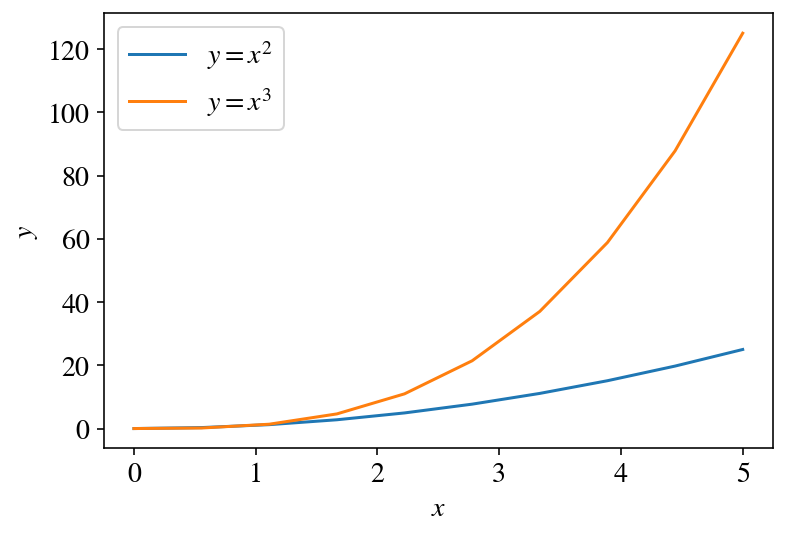

In [23]:
fig, ax = plt.subplots(figsize=(6,4)) # size in inches

ax.plot(x, x**2, label=r"$y = x^2$")
ax.plot(x, x**3, label=r"$y = x^3$")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend(loc=2);

Restore the defaults. It seems that "inline" (bottom row) has different defaults than non-inline (top row)

In [24]:
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(inline_rc)

## Multiple axes <a class="anchor" id="multiax"></a>

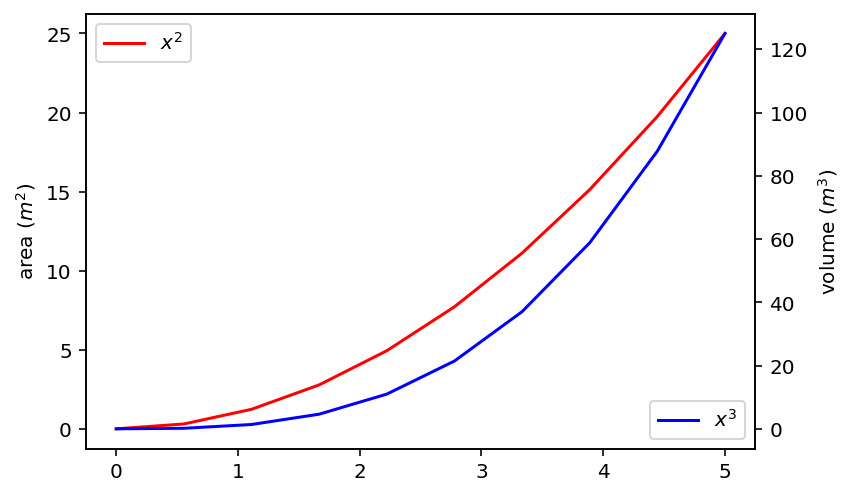

In [25]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, 'r', label=r'$x^2$')
ax1.set_ylabel(r"area $(m^2)$")
ax1.legend(loc=2)
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, 'b', label=r'$x^3$')
ax2.set_ylabel(r"volume $(m^3)$")
ax2.legend(loc=4);

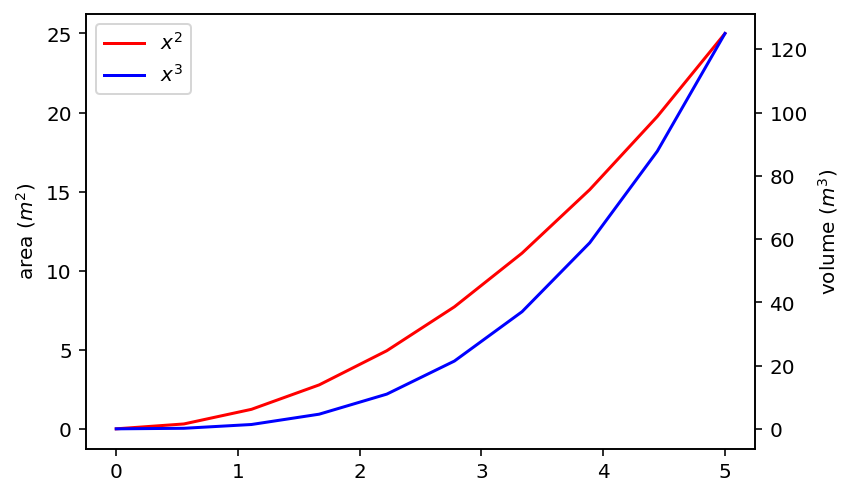

In [26]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, 'r', label=r'$x^2$')
ax1.set_ylabel(r"area $(m^2)$")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, 'b', label=r'$x^3$')
ax2.set_ylabel(r"volume $(m^3)$")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2);

## Publication ready plots <a class="anchor" id="pubplots"></a>

Below you will find a few different ways to make publication ready plots. The focus is on obtaining 1/2 page size plots (single column) with the approprieate font size.

### Method 1

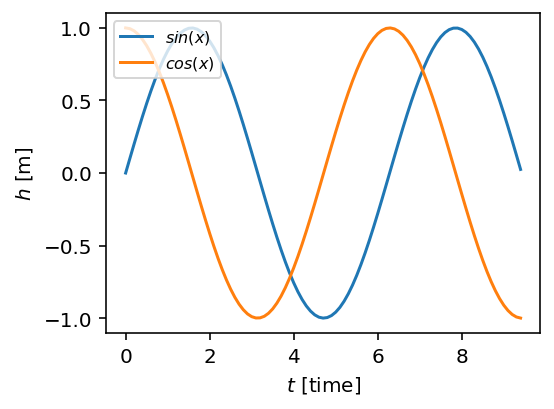

In [27]:
# No global parameters are changed

x = np.arange(0.0, 3*np.pi , 0.1)

fig, ax = plt.subplots(figsize=(4,3)) # size in inches

ax.plot(x,np.sin(x), label=r"$sin(x)$")
ax.plot(x,np.cos(x), label=r"$cos(x)$")

ax.set_xlabel(r'$t$ [time]', fontsize=10)
ax.set_ylabel(r'$h$ [m]', fontsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.legend(loc=2, fontsize=8)
fig.tight_layout();
plt.savefig('TestFig.pdf',bbox_inches="tight", pad_inches=0.005);

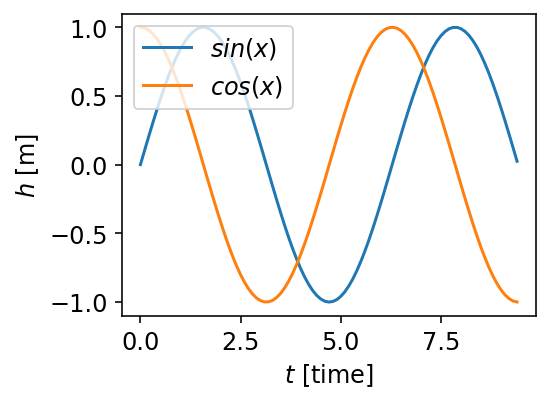

In [28]:
# change the global parameters

mpl.rcParams.update({'font.size': 12})

x = np.arange(0.0, 3*np.pi , 0.1)

fig, ax = plt.subplots(figsize=(4,3)) # size in inches

ax.plot(x,np.sin(x), label=r"$sin(x)$")
ax.plot(x,np.cos(x), label=r"$cos(x)$")

ax.set_xlabel(r'$t$ [time]')
ax.set_ylabel(r'$h$ [m]')
ax.legend(loc=2)
fig.tight_layout();
plt.savefig('TestFig.pdf',bbox_inches="tight", pad_inches=0.005);

### Method 2

The following was swipped directly from Bastian Bloessl at the following webpage: https://www.bastibl.net/publication-quality-plots/

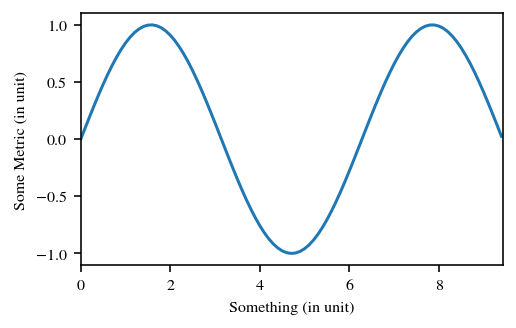

In [29]:
# 8pt figure font (1/2 page width figure)

mpl.rcParams.update({'font.size': 8, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

# with was measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

x = np.arange(0.0, 3*np.pi , 0.1)
plt.plot(x, np.sin(x))

ax.set_ylabel('Some Metric (in unit)')
ax.set_xlabel('Something (in unit)')
ax.set_xlim(0, 3*np.pi)

fig.set_size_inches(width, height)
fig.savefig('plot.pdf')

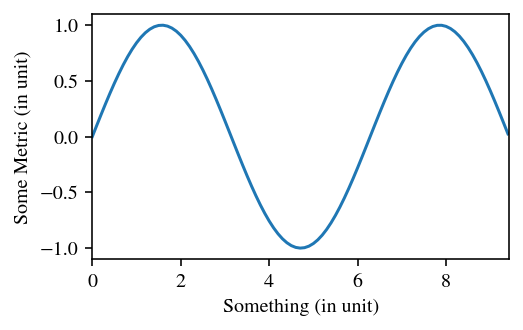

In [30]:
# 10pt figure font (1/2 page width figure)

mpl.rcParams.update({'font.size': 10, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

# with was measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.16, bottom=.19, right=.99, top=.98)

x = np.arange(0.0, 3*np.pi , 0.1)
plt.plot(x, np.sin(x))

ax.set_ylabel('Some Metric (in unit)')
ax.set_xlabel('Something (in unit)')
ax.set_xlim(0, 3*np.pi)

fig.set_size_inches(width, height)
fig.savefig('plot.pdf')

In [31]:
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

mpl.rcParams.update(inline_rc)